In [1]:
def spline_data():
    t = [
        0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8,
        4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8,
        8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0
    ]
    
    y = [
        5.2057354, 5.1685295, 4.4693175, 3.1676415, 3.2186727, 2.7558774, 1.6360628, 0.72527756, 0.24583927, -0.58044829,
        -0.87676552, -0.82548372, -0.79731423, -0.05948396, -0.049755249, 0.70500264, 0.82600211, 0.1403059, 0.51054544,
        0.38582234, 0.83860086, 0.41632982, 0.81154682, 0.23060127, 0.84177419, 0.34454159, 0.37408514, 0.86597229,
        0.2120701, 0.71788999, 0.80995603, 1.0691093, 0.64850169, 1.0924844, 0.76143045, 1.2122857, 1.1772892, 0.84659501,
        0.95866895, 1.8211318, 1.8015936, 1.6354389, 1.7742953, 2.5264767, 2.6522776, 3.7501151, 4.0564222, 4.6247681,
        4.9123027, 5.8068946, 7.0260935
    ]
    
    return t, y

t, y = spline_data()


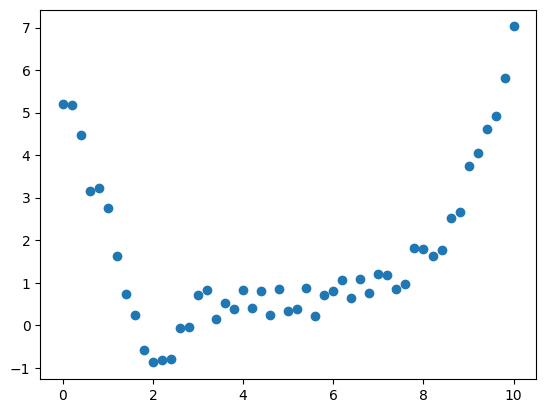

In [2]:
import matplotlib.pyplot as plt

plt.plot(t, y, 'o')

In [5]:
import numpy as np

from scipy.interpolate import make_interp_spline

knots = np.arange(0, 11, 1)

make_interp_spline(t, y, k=3, t=knots)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

9

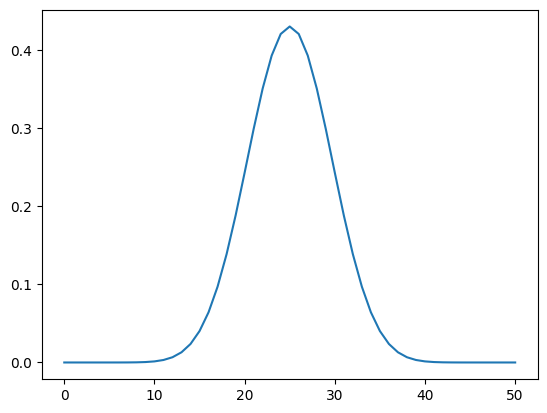

In [26]:
# Path: problems\A6.9 Least-squares fitting with convex splines.ipynb
def spline_data():
    t = [
        0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8,
        4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8,
        8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0
    ]
    
    y = [
        5.2057354, 5.1685295, 4.4693175, 3.1676415, 3.2186727, 2.7558774, 1.6360628, 0.72527756, 0.24583927, -0.58044829,
        -0.87676552, -0.82548372, -0.79731423, -0.05948396, -0.049755249, 0.70500264, 0.82600211, 0.1403059, 0.51054544,
        0.38582234, 0.83860086, 0.41632982, 0.81154682, 0.23060127, 0.84177419, 0.34454159, 0.37408514, 0.86597229,
        0.2120701, 0.71788999, 0.80995603, 1.0691093, 0.64850169, 1.0924844, 0.76143045, 1.2122857, 1.1772892, 0.84659501,
        0.95866895, 1.8211318, 1.8015936, 1.6354389, 1.7742953, 2.5264767, 2.6522776, 3.7501151, 4.0564222, 4.6247681,
        4.9123027, 5.8068946, 7.0260935
    ]

    return t, y

t, y = spline_data()

#convex spline fitting
import numpy as np
from scipy.interpolate import BSpline

knots = np.arange(0, 11, 1)
plt.plot(BSpline.basis_element(knots)(t))

BSpline.basis_element(knots).k

In [10]:
breakpoints  = np.arange(0, 11, 1)
degree = 3  # Choose the degree of the B-spline (cubic)
knots = np.concatenate(([breakpoints[0]] * (degree + 1), breakpoints[1:-1], [breakpoints[-1]] * (degree + 1)))  # Define the knots vector

basis_elements = [print(knots[i:i+degree+2]) for i in range(len(breakpoints) - 1)]


[0 0 0 0 1]
[0 0 0 1 2]
[0 0 1 2 3]
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]
[ 6  7  8  9 10]


In [ ]:
#Spine basis function for a given knot vector
def spline_basis(t, knots, degree):
    """Compute the B-spline basis functions for a given set of knots and degree.
    
    Parameters
    ----------
    t : array_like
        The points at which to evaluate the basis functions.
    knots : array_like
        The knots of the B-spline.
    degree : int
        The degree of the B-spline.
    
    Returns
    -------
    basis : ndarray
        The basis functions evaluated at the given points.
    """
    t = np.asarray(t)
    knots = np.asarray(knots)
    basis = np.zeros((len(t), len(knots) - degree - 1))
    for i in range(len(knots) - degree - 1):
        basis[:, i] = BSpline.basis_element(knots, i, degree)(t)
    return basis
    

In [30]:
'''

number of control points + orders of the spline = number of knots
number of control points + degree + 1 = number of knots
degree = number of knots - number of control points - 1

nummber of control points = number of basis functions

d = 4, p = 3
number of control points = 11
number of knots = 15

'''

d = 4
p = 3

control_points = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
knots = np.concatenate(([control_points[0]] * (p + 1), control_points[1:-1], [control_points[-1]] * (p + 1)))  # Define the knots vector

# basis_elements = [BSpline.basis_element(control_points[0:d+1]] f

# plt.plot(BSpline.basis_element(control_points[0:d+1])(control_points))



#plt.plot(BSpline.basis_element(knots[0:order+2])(knots))

In [87]:
print(len(knots))
knots

17


array([ 0,  0,  0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 10])

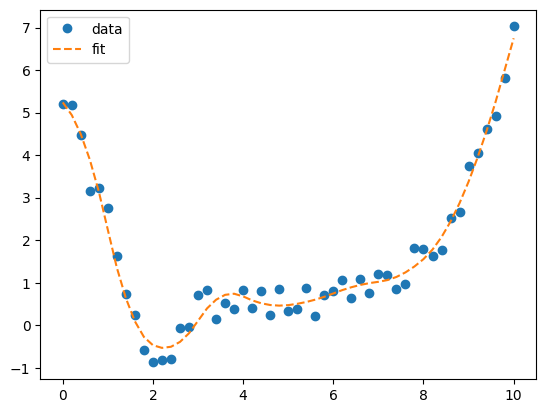

In [100]:
import cvxpy as cp

basis_fns = [BSpline.basis_element(knots[i-p:i+1]) for i in np.arange(p, len(knots))]

A = np.zeros((len(t), len(control_points) + p))
for i, t_i in enumerate(t):
    A[i, :] = np.array([basis_fn(t_i) for basis_fn in basis_fns]).flatten()

x = cp.Variable(A.shape[1])
problem = cp.Problem(cp.Minimize(cp.sum_squares(A @ x - y)))
problem.solve()

plt.plot(t, y, 'o', label='data')
plt.plot(t, A @ x.value, '--', label='fit')
plt.legend()

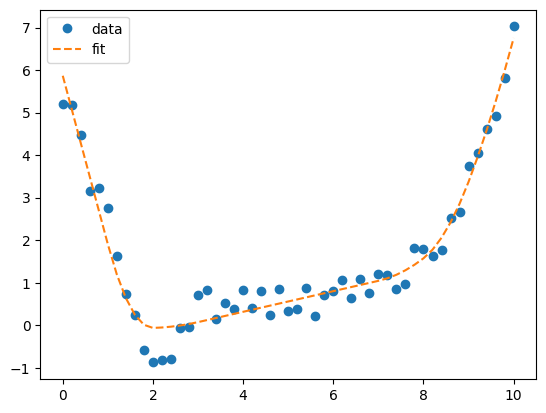

In [102]:
### Second derivate of spine basis function

G = np.zeros((len(t), len(control_points) + 3))
for i, t_i in enumerate(t):
    G[i, :] = np.array([basis_fn(t_i, 2) for basis_fn in basis_fns]).flatten()

x = cp.Variable(A.shape[1])
problem = cp.Problem(cp.Minimize(cp.sum_squares(A @ x - y)), [G @ x >= 0])
problem.solve()

plt.plot(t, y, 'o', label='data')
plt.plot(t, A @ x.value, '--', label='fit')
plt.legend()
